<a href="https://colab.research.google.com/github/jiin124/4th_kaggle_study/blob/main/5%EC%A3%BC%EC%B0%A8/%EC%9E%90%EB%8F%99%EC%B0%A8_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [169]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [170]:
!kaggle competitions download -c 2021-ai-w3-p2

train_data.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submit.csv: Skipping, found more recently modified local copy (use --force to force download)
test_data.csv: Skipping, found more recently modified local copy (use --force to force download)


In [256]:
train=pd.read_csv('train_data.csv')
test=pd.read_csv('test_data.csv')
sample=pd.read_csv('sample_submit.csv')

In [184]:
train.head()

,ID,company,model,year,transmission,mileage,fueltype,tax,mpg,engineSize,price
0,0,2,Focus,2019,1,3764,4,145,34.5,2.3,26299
1,1,1,I10,2015,1,27056,4,20,60.1,1.0,5495
2,2,3,A3,2019,3,3375,4,145,34.5,2.0,32400
3,3,3,A6,2019,0,5743,0,145,47.9,2.0,29990
4,4,2,Fiesta,2015,1,32782,4,0,65.7,1.0,7250


In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17085 entries, 0 to 17084
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            17085 non-null  int64  
 1   company       17085 non-null  int64  
 2   model         17085 non-null  object 
 3   year          17085 non-null  int64  
 4   transmission  17085 non-null  int64  
 5   mileage       17085 non-null  int64  
 6   fueltype      17085 non-null  int64  
 7   tax           17085 non-null  int64  
 8   mpg           17085 non-null  float64
 9   engineSize    17085 non-null  float64
 10  price         17085 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 1.4+ MB


In [120]:
train.isna().sum()

ID              0
company         0
model           0
year            0
transmission    0
mileage         0
fueltype        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

##EDA

In [8]:
train.columns

Index(['ID', 'company', 'model', 'year', 'transmission', 'mileage', 'fueltype',
       'tax', 'mpg', 'engineSize', 'price'],
      dtype='object')

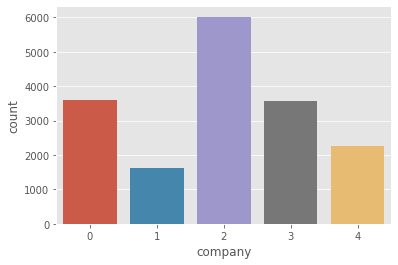

In [185]:
sns.countplot(data=train,x='company')

다행이 전처리가 되어있음 bmw, ford, hyundai, audi, toyota

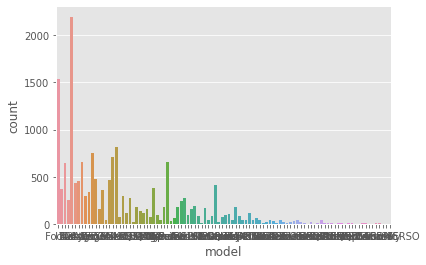

In [186]:
sns.countplot(data=train,x='model')

In [187]:
train['model'].value_counts()

 Fiesta      2197
 Focus       1537
 3 Series     819
 Kuga         746
 Yaris        711
             ... 
 Getz           2
 S8             1
 Verso-S        1
 S5             1
 Veloster       1
Name: model, Length: 98, dtype: int64

라벨링이 필요해 보임

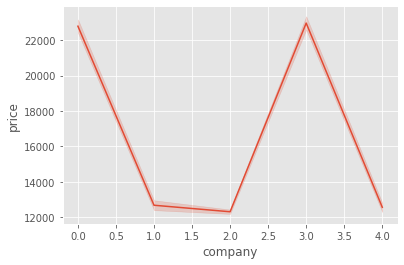

In [188]:
sns.lineplot(data=train,
             x='company',
             y='price')

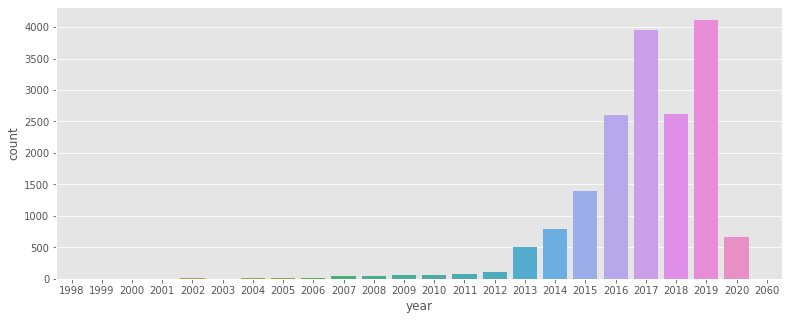

In [189]:
plt.figure(figsize=(13,5))
sns.countplot(data=train,x='year')

이상치 발견. 2060은 뭐람

In [145]:
train['year'].value_counts()

2019    4113
2017    3961
2018    2625
2016    2599
2015    1393
2014     784
2020     658
2013     505
2012     115
2011      75
2009      63
2010      56
2008      46
2007      37
2005      13
2006      12
2004      12
2002       7
2001       3
2003       3
2000       2
1999       2
1998       1
Name: year, dtype: int64

In [257]:
#2060은 2006으로 바꾸어주기
train.loc[train['year']==2060,'year']=2006

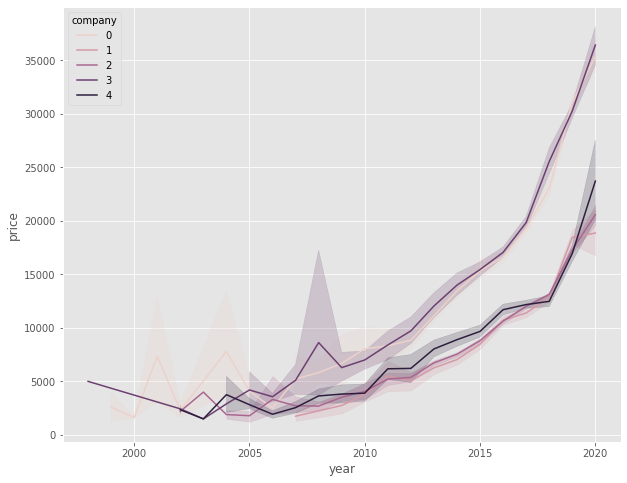

In [100]:
plt.figure(figsize=(10,8))
sns.lineplot(data=train,
             x='year',
             y='price',
             hue='company')

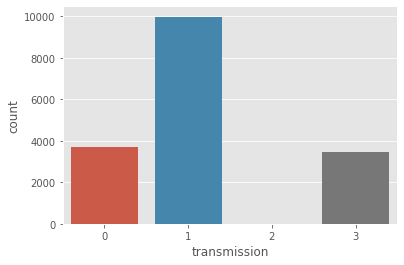

In [17]:
sns.countplot(data=train,x='transmission')

In [18]:
train['transmission'].value_counts()

1    9972
0    3678
3    3434
2       1
Name: transmission, dtype: int64

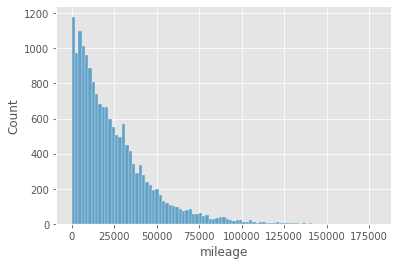

In [19]:
sns.histplot(data=train,x='mileage')

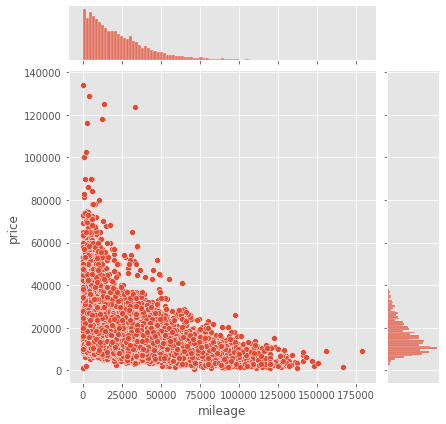

In [22]:
sns.jointplot(data=train,
              x='mileage',
              y='price')

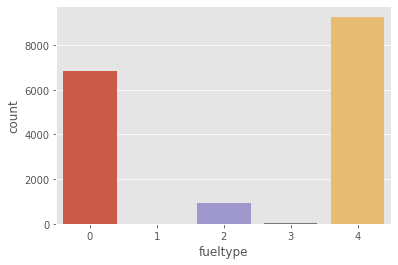

In [20]:
sns.countplot(data=train,x='fueltype')

In [21]:
train['fueltype'].value_counts()

4    9270
0    6855
2     910
3      48
1       2
Name: fueltype, dtype: int64

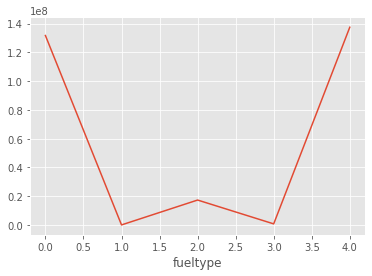

In [124]:
train.groupby('fueltype').sum()['price'].plot()

0,4일때 가격이높군

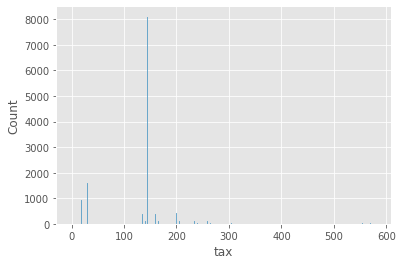

In [26]:
sns.histplot(data=train,x='tax')

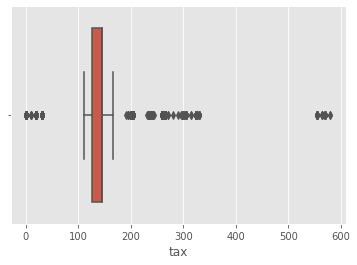

In [30]:
sns.boxplot(data=train,x='tax')

In [244]:
out1=train.loc[train['tax']>500].index
out1

Int64Index([  273,   542,  1538,  1757,  1794,  2184,  2361,  2368,  2732,
             2968,  3335,  3818,  4199,  4442,  5427,  6289,  6575,  7276,
             7640,  8560,  8818,  9702, 10501, 10910, 11221, 11756, 12984,
            13940, 14082, 14650, 15171, 16636],
           dtype='int64')

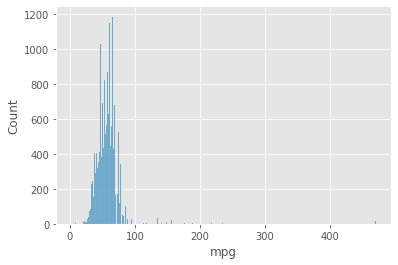

In [52]:
sns.histplot(data=train,x='mpg')

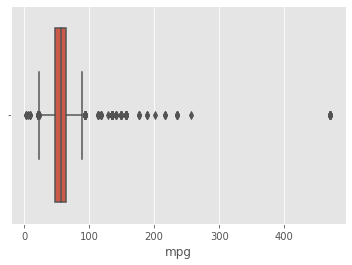

In [51]:
sns.boxplot(data=train,x='mpg')

In [245]:
out2=train.loc[train['tax']>400].index
out2

Int64Index([  273,   542,  1538,  1757,  1794,  2184,  2361,  2368,  2732,
             2968,  3335,  3818,  4199,  4442,  5427,  6289,  6575,  7276,
             7640,  8560,  8818,  9702, 10501, 10910, 11221, 11756, 12984,
            13940, 14082, 14650, 15171, 16636],
           dtype='int64')

이상치 발견

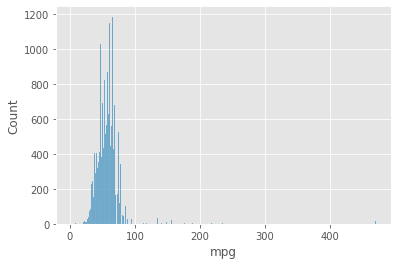

In [101]:
sns.histplot(data=train,x='mpg')

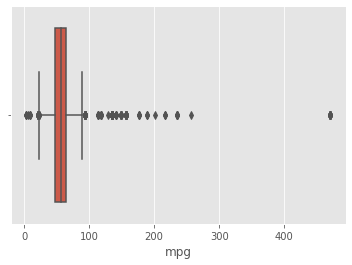

In [102]:
sns.boxplot(data=train,x='mpg')

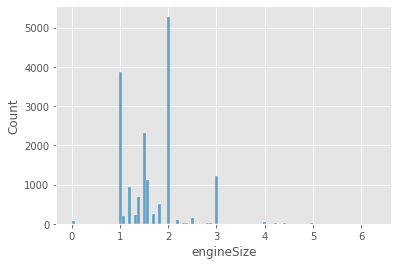

In [103]:
sns.histplot(data=train,x='engineSize')

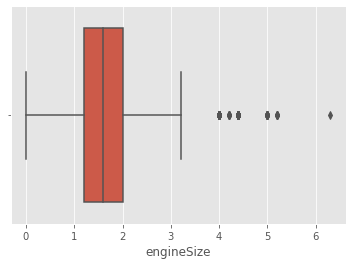

In [246]:
sns.boxplot(data=train,x='engineSize')

In [247]:
out=train.loc[train['engineSize']>5].index
out

Int64Index([2184, 3342, 7792, 11221, 11765, 12487, 13771, 13940], dtype='int64')

In [251]:
outlier=[2184, 3342, 7792, 11221, 11765, 12487, 13771, 13940,
         273,   542,  1538,  1757,  1794,  2184,  2361,  2368,  2732,
             2968,  3335,  3818,  4199,  4442,  5427,  6289,  6575,  7276,
             7640,  8560,  8818,  9702, 10501, 10910, 11221, 11756, 12984,
            13940, 14082, 14650, 15171, 16636,273,   542,  1538,  1757,  1794,  2184,  2361,  2368,  2732,
             2968,  3335,  3818,  4199,  4442,  5427,  6289,  6575,  7276,
             7640,  8560,  8818,  9702, 10501, 10910, 11221, 11756, 12984,
            13940, 14082, 14650, 15171, 16636]

outlier=set(outlier)
outlier

{273,
 542,
 1538,
 1757,
 1794,
 2184,
 2361,
 2368,
 2732,
 2968,
 3335,
 3342,
 3818,
 4199,
 4442,
 5427,
 6289,
 6575,
 7276,
 7640,
 7792,
 8560,
 8818,
 9702,
 10501,
 10910,
 11221,
 11756,
 11765,
 12487,
 12984,
 13771,
 13940,
 14082,
 14650,
 15171,
 16636}

In [253]:
outlier=list(outlier)
outlier

[1538,
 1794,
 14082,
 10501,
 3335,
 2184,
 3342,
 273,
 6289,
 2968,
 542,
 10910,
 2732,
 6575,
 5427,
 12984,
 2361,
 14650,
 2368,
 15171,
 12487,
 13771,
 11221,
 7640,
 4442,
 1757,
 9702,
 4199,
 3818,
 7276,
 11756,
 7792,
 8560,
 8818,
 13940,
 11765,
 16636]

In [254]:
train=train.drop(outlier)

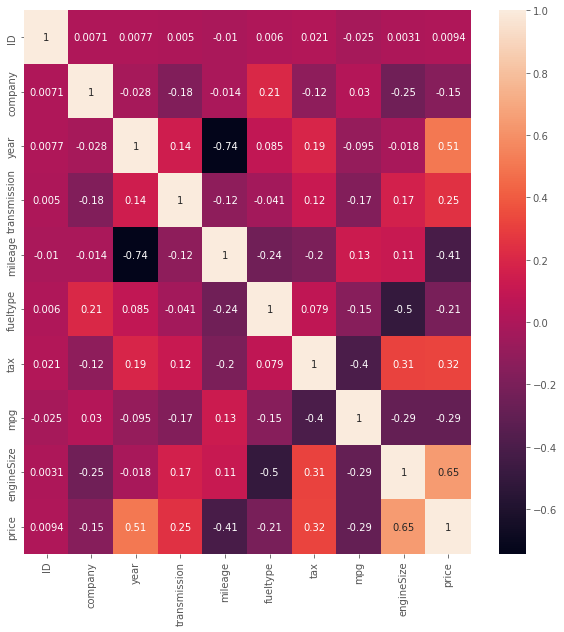

In [80]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

In [94]:
train.columns

Index(['ID', 'company', 'model', 'year', 'transmission', 'mileage', 'fueltype',
       'tax', 'mpg', 'engineSize', 'price'],
      dtype='object')

In [258]:
from sklearn.preprocessing import LabelEncoder

la=LabelEncoder()

train['model']=la.fit_transform(train['model'])
test['model']=la.transform(test['model'])


display(train.head())
print()
display(test.head())

,ID,company,model,year,transmission,mileage,fueltype,tax,mpg,engineSize,price
0,0,2,26,2019,1,3764,4,145,34.5,2.3,26299
1,1,1,34,2015,1,27056,4,20,60.1,1.0,5495
2,2,3,9,2019,3,3375,4,145,34.5,2.0,32400
3,3,3,12,2019,0,5743,0,145,47.9,2.0,29990
4,4,2,25,2015,1,32782,4,0,65.7,1.0,7250


,ID,company,model,year,transmission,mileage,fueltype,tax,mpg,engineSize
0,0,2,44,2017,1,10150,4,145,57.7,1.2
1,1,2,46,2013,1,50216,0,145,53.3,2.0
2,2,3,60,2016,1,34189,0,200,47.9,2.0
3,3,1,34,2020,1,1900,4,145,56.5,1.0
4,4,0,2,2014,0,79809,0,20,68.9,2.0


In [230]:
x_train=train.drop('price',axis=1)
y_train=train['price']
x_test=test

In [231]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(17085, 10)
(17085,)
(16831, 10)


In [232]:
x_train.drop('ID',axis=1,inplace=True)


In [233]:
x_test.drop('ID',axis=1,inplace=True)

In [234]:
x_train

,company,model,year,transmission,mileage,fueltype,tax,mpg,engineSize
0,2,26,2019,1,3764,4,145,34.5,2.3
1,1,34,2015,1,27056,4,20,60.1,1.0
2,3,9,2019,3,3375,4,145,34.5,2.0
3,3,12,2019,0,5743,0,145,47.9,2.0
4,2,25,2015,1,32782,4,0,65.7,1.0
...,...,...,...,...,...,...,...,...,...
17080,0,0,2018,0,4666,4,145,32.5,3.0
17081,3,10,2020,3,22601,4,145,39.2,2.0
17082,4,93,2018,1,20312,4,145,47.1,1.5
17083,2,26,2018,1,18695,4,145,58.9,1.0


In [235]:
x_train.columns

Index(['company', 'model', 'year', 'transmission', 'mileage', 'fueltype',
       'tax', 'mpg', 'engineSize'],
      dtype='object')

In [239]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)

## 모델링

In [240]:
import torch
import torch.optim as optim

torch.manual_seed(1)

epochs = 100000

device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train = torch.FloatTensor(x_train).to(device)
y_train = torch.FloatTensor(y_train).reshape(-1,1).to(device)

W = torch.zeros((9,1), requires_grad=True, device=device)
b = torch.zeros(1, requires_grad=True, device=device)

optimizer = optim.SGD([W,b], lr=1e-5)

In [210]:
pip install livelossplot

In [241]:
from tqdm import tqdm
from livelossplot import PlotLosses
liveloss = PlotLosses()

disp_freq = 400
batch_size = 16000

visualizer = {}

for epoch in tqdm(range(epochs)):

    H = x_train.matmul(W) + b
    #Mean Square Error
#     loss =((H - train_y)**2).mean()
    #Mean Absolute Error
    loss = torch.mean(torch.abs(H - y_train))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch%disp_freq==0:
#         visualizer['MAE'] = loss
        print(loss)   
#         liveloss.update(visualizer)
#         liveloss.draw()

  0%|          | 257/100000 [00:00<00:38, 2569.37it/s]

tensor(16819.7637, grad_fn=<MeanBackward0>)
tensor(7220.8271, grad_fn=<MeanBackward0>)


  1%|          | 1245/100000 [00:00<00:40, 2419.43it/s]

tensor(6881.5239, grad_fn=<MeanBackward0>)
tensor(6871.5366, grad_fn=<MeanBackward0>)


  2%|▏         | 1974/100000 [00:00<00:41, 2388.81it/s]

tensor(6870.2471, grad_fn=<MeanBackward0>)
tensor(6869.9116, grad_fn=<MeanBackward0>)


  3%|▎         | 2689/100000 [00:01<00:42, 2269.29it/s]

tensor(6869.8916, grad_fn=<MeanBackward0>)
tensor(6869.8794, grad_fn=<MeanBackward0>)


  4%|▎         | 3641/100000 [00:01<00:40, 2351.96it/s]

tensor(6869.8662, grad_fn=<MeanBackward0>)
tensor(6869.8530, grad_fn=<MeanBackward0>)


  4%|▍         | 4363/100000 [00:01<00:40, 2367.03it/s]

tensor(6869.8413, grad_fn=<MeanBackward0>)
tensor(6869.8276, grad_fn=<MeanBackward0>)


  5%|▌         | 5076/100000 [00:02<00:40, 2343.67it/s]

tensor(6869.8154, grad_fn=<MeanBackward0>)
tensor(6869.8032, grad_fn=<MeanBackward0>)


  6%|▌         | 6006/100000 [00:02<00:42, 2215.98it/s]

tensor(6869.7900, grad_fn=<MeanBackward0>)
tensor(6869.7778, grad_fn=<MeanBackward0>)


  7%|▋         | 6723/100000 [00:02<00:40, 2326.39it/s]

tensor(6869.7646, grad_fn=<MeanBackward0>)
tensor(6869.7520, grad_fn=<MeanBackward0>)


  8%|▊         | 7658/100000 [00:03<00:40, 2263.55it/s]

tensor(6869.7397, grad_fn=<MeanBackward0>)
tensor(6869.7285, grad_fn=<MeanBackward0>)


  8%|▊         | 8374/100000 [00:03<00:38, 2357.73it/s]

tensor(6869.7153, grad_fn=<MeanBackward0>)
tensor(6869.7026, grad_fn=<MeanBackward0>)


  9%|▉         | 9091/100000 [00:03<00:38, 2356.57it/s]

tensor(6869.6904, grad_fn=<MeanBackward0>)
tensor(6869.6782, grad_fn=<MeanBackward0>)


 10%|█         | 10027/100000 [00:04<00:39, 2262.35it/s]

tensor(6869.6665, grad_fn=<MeanBackward0>)
tensor(6869.6543, grad_fn=<MeanBackward0>)


 11%|█         | 10744/100000 [00:04<00:38, 2346.13it/s]

tensor(6869.6431, grad_fn=<MeanBackward0>)
tensor(6869.6309, grad_fn=<MeanBackward0>)


 11%|█▏        | 11477/100000 [00:04<00:36, 2418.07it/s]

tensor(6869.6187, grad_fn=<MeanBackward0>)
tensor(6869.6069, grad_fn=<MeanBackward0>)


 12%|█▏        | 12434/100000 [00:05<00:37, 2336.44it/s]

tensor(6869.5942, grad_fn=<MeanBackward0>)
tensor(6869.5825, grad_fn=<MeanBackward0>)


 13%|█▎        | 13146/100000 [00:05<00:37, 2345.81it/s]

tensor(6869.5708, grad_fn=<MeanBackward0>)
tensor(6869.5586, grad_fn=<MeanBackward0>)


 14%|█▍        | 13858/100000 [00:05<00:37, 2325.17it/s]

tensor(6869.5469, grad_fn=<MeanBackward0>)
tensor(6869.5347, grad_fn=<MeanBackward0>)


 15%|█▍        | 14786/100000 [00:06<00:37, 2255.45it/s]

tensor(6869.5229, grad_fn=<MeanBackward0>)
tensor(6869.5107, grad_fn=<MeanBackward0>)


 15%|█▌        | 15487/100000 [00:06<00:36, 2292.29it/s]

tensor(6869.4990, grad_fn=<MeanBackward0>)
tensor(6869.4868, grad_fn=<MeanBackward0>)


 16%|█▋        | 16438/100000 [00:07<00:37, 2249.36it/s]

tensor(6869.4736, grad_fn=<MeanBackward0>)
tensor(6869.4624, grad_fn=<MeanBackward0>)


 17%|█▋        | 17145/100000 [00:07<00:35, 2308.76it/s]

tensor(6869.4502, grad_fn=<MeanBackward0>)
tensor(6869.4385, grad_fn=<MeanBackward0>)


 18%|█▊        | 17854/100000 [00:07<00:35, 2321.14it/s]

tensor(6869.4268, grad_fn=<MeanBackward0>)
tensor(6869.4150, grad_fn=<MeanBackward0>)


 19%|█▉        | 18792/100000 [00:08<00:35, 2292.67it/s]

tensor(6869.4038, grad_fn=<MeanBackward0>)
tensor(6869.3921, grad_fn=<MeanBackward0>)


 19%|█▉        | 19498/100000 [00:08<00:34, 2315.53it/s]

tensor(6869.3799, grad_fn=<MeanBackward0>)
tensor(6869.3677, grad_fn=<MeanBackward0>)


 20%|██        | 20469/100000 [00:08<00:33, 2385.84it/s]

tensor(6869.3560, grad_fn=<MeanBackward0>)
tensor(6869.3442, grad_fn=<MeanBackward0>)


 21%|██        | 21173/100000 [00:09<00:34, 2279.22it/s]

tensor(6869.3320, grad_fn=<MeanBackward0>)
tensor(6869.3203, grad_fn=<MeanBackward0>)


 22%|██▏       | 21900/100000 [00:09<00:32, 2370.03it/s]

tensor(6869.3091, grad_fn=<MeanBackward0>)
tensor(6869.2969, grad_fn=<MeanBackward0>)


 23%|██▎       | 22629/100000 [00:09<00:32, 2398.61it/s]

tensor(6869.2847, grad_fn=<MeanBackward0>)
tensor(6869.2729, grad_fn=<MeanBackward0>)


 24%|██▎       | 23572/100000 [00:10<00:33, 2276.16it/s]

tensor(6869.2612, grad_fn=<MeanBackward0>)
tensor(6869.2500, grad_fn=<MeanBackward0>)


 24%|██▍       | 24285/100000 [00:10<00:32, 2322.64it/s]

tensor(6869.2378, grad_fn=<MeanBackward0>)
tensor(6869.2261, grad_fn=<MeanBackward0>)


 25%|██▌       | 25233/100000 [00:10<00:32, 2324.18it/s]

tensor(6869.2144, grad_fn=<MeanBackward0>)
tensor(6869.2031, grad_fn=<MeanBackward0>)


 26%|██▌       | 25938/100000 [00:11<00:32, 2256.33it/s]

tensor(6869.1909, grad_fn=<MeanBackward0>)
tensor(6869.1797, grad_fn=<MeanBackward0>)


 27%|██▋       | 26641/100000 [00:11<00:32, 2269.76it/s]

tensor(6869.1670, grad_fn=<MeanBackward0>)
tensor(6869.1558, grad_fn=<MeanBackward0>)


 28%|██▊       | 27569/100000 [00:11<00:31, 2286.88it/s]

tensor(6869.1440, grad_fn=<MeanBackward0>)
tensor(6869.1328, grad_fn=<MeanBackward0>)


 28%|██▊       | 28259/100000 [00:12<00:31, 2252.13it/s]

tensor(6869.1211, grad_fn=<MeanBackward0>)
tensor(6869.1094, grad_fn=<MeanBackward0>)


 29%|██▉       | 29227/100000 [00:12<00:29, 2359.67it/s]

tensor(6869.0977, grad_fn=<MeanBackward0>)
tensor(6869.0864, grad_fn=<MeanBackward0>)


 30%|██▉       | 29959/100000 [00:12<00:30, 2323.31it/s]

tensor(6869.0757, grad_fn=<MeanBackward0>)
tensor(6869.0640, grad_fn=<MeanBackward0>)


 31%|███       | 30669/100000 [00:13<00:29, 2311.40it/s]

tensor(6869.0522, grad_fn=<MeanBackward0>)
tensor(6869.0400, grad_fn=<MeanBackward0>)


 32%|███▏      | 31634/100000 [00:13<00:28, 2380.06it/s]

tensor(6869.0288, grad_fn=<MeanBackward0>)
tensor(6869.0171, grad_fn=<MeanBackward0>)


 32%|███▏      | 32374/100000 [00:14<00:27, 2441.28it/s]

tensor(6869.0059, grad_fn=<MeanBackward0>)
tensor(6868.9946, grad_fn=<MeanBackward0>)


 33%|███▎      | 33086/100000 [00:14<00:29, 2294.02it/s]

tensor(6868.9829, grad_fn=<MeanBackward0>)
tensor(6868.9717, grad_fn=<MeanBackward0>)


 34%|███▍      | 34056/100000 [00:14<00:27, 2389.35it/s]

tensor(6868.9595, grad_fn=<MeanBackward0>)
tensor(6868.9487, grad_fn=<MeanBackward0>)


 35%|███▍      | 34795/100000 [00:15<00:27, 2400.02it/s]

tensor(6868.9365, grad_fn=<MeanBackward0>)
tensor(6868.9253, grad_fn=<MeanBackward0>)


 36%|███▌      | 35506/100000 [00:15<00:28, 2295.63it/s]

tensor(6868.9146, grad_fn=<MeanBackward0>)
tensor(6868.9028, grad_fn=<MeanBackward0>)


 36%|███▋      | 36440/100000 [00:15<00:27, 2278.19it/s]

tensor(6868.8911, grad_fn=<MeanBackward0>)
tensor(6868.8799, grad_fn=<MeanBackward0>)


 37%|███▋      | 37132/100000 [00:16<00:27, 2285.04it/s]

tensor(6868.8682, grad_fn=<MeanBackward0>)
tensor(6868.8564, grad_fn=<MeanBackward0>)


 38%|███▊      | 37832/100000 [00:16<00:27, 2261.55it/s]

tensor(6868.8452, grad_fn=<MeanBackward0>)
tensor(6868.8350, grad_fn=<MeanBackward0>)


 39%|███▉      | 38794/100000 [00:16<00:25, 2388.30it/s]

tensor(6868.8223, grad_fn=<MeanBackward0>)
tensor(6868.8110, grad_fn=<MeanBackward0>)


 40%|███▉      | 39511/100000 [00:17<00:25, 2367.72it/s]

tensor(6868.7998, grad_fn=<MeanBackward0>)
tensor(6868.7881, grad_fn=<MeanBackward0>)


 40%|████      | 40447/100000 [00:17<00:26, 2289.70it/s]

tensor(6868.7769, grad_fn=<MeanBackward0>)
tensor(6868.7656, grad_fn=<MeanBackward0>)


 41%|████      | 41186/100000 [00:17<00:24, 2414.50it/s]

tensor(6868.7544, grad_fn=<MeanBackward0>)
tensor(6868.7432, grad_fn=<MeanBackward0>)


 42%|████▏     | 41905/100000 [00:18<00:25, 2311.24it/s]

tensor(6868.7314, grad_fn=<MeanBackward0>)
tensor(6868.7202, grad_fn=<MeanBackward0>)


 43%|████▎     | 42820/100000 [00:18<00:25, 2238.01it/s]

tensor(6868.7090, grad_fn=<MeanBackward0>)
tensor(6868.6978, grad_fn=<MeanBackward0>)


 44%|████▎     | 43527/100000 [00:18<00:24, 2327.59it/s]

tensor(6868.6860, grad_fn=<MeanBackward0>)
tensor(6868.6748, grad_fn=<MeanBackward0>)


 44%|████▍     | 44458/100000 [00:19<00:24, 2296.21it/s]

tensor(6868.6636, grad_fn=<MeanBackward0>)
tensor(6868.6523, grad_fn=<MeanBackward0>)


 45%|████▌     | 45164/100000 [00:19<00:24, 2282.81it/s]

tensor(6868.6406, grad_fn=<MeanBackward0>)
tensor(6868.6289, grad_fn=<MeanBackward0>)


 46%|████▌     | 45885/100000 [00:19<00:23, 2351.33it/s]

tensor(6868.6172, grad_fn=<MeanBackward0>)
tensor(6868.6064, grad_fn=<MeanBackward0>)


 47%|████▋     | 46817/100000 [00:20<00:23, 2299.42it/s]

tensor(6868.5952, grad_fn=<MeanBackward0>)
tensor(6868.5840, grad_fn=<MeanBackward0>)


 48%|████▊     | 47504/100000 [00:20<00:23, 2265.48it/s]

tensor(6868.5718, grad_fn=<MeanBackward0>)
tensor(6868.5605, grad_fn=<MeanBackward0>)


 48%|████▊     | 48434/100000 [00:20<00:22, 2309.16it/s]

tensor(6868.5493, grad_fn=<MeanBackward0>)
tensor(6868.5386, grad_fn=<MeanBackward0>)


 49%|████▉     | 49153/100000 [00:21<00:21, 2354.16it/s]

tensor(6868.5264, grad_fn=<MeanBackward0>)
tensor(6868.5151, grad_fn=<MeanBackward0>)


 50%|████▉     | 49860/100000 [00:21<00:21, 2308.01it/s]

tensor(6868.5044, grad_fn=<MeanBackward0>)
tensor(6868.4927, grad_fn=<MeanBackward0>)


 51%|█████     | 50826/100000 [00:22<00:20, 2378.54it/s]

tensor(6868.4819, grad_fn=<MeanBackward0>)
tensor(6868.4702, grad_fn=<MeanBackward0>)


 52%|█████▏    | 51546/100000 [00:22<00:20, 2363.58it/s]

tensor(6868.4585, grad_fn=<MeanBackward0>)
tensor(6868.4468, grad_fn=<MeanBackward0>)


 52%|█████▏    | 52251/100000 [00:22<00:21, 2268.10it/s]

tensor(6868.4360, grad_fn=<MeanBackward0>)
tensor(6868.4243, grad_fn=<MeanBackward0>)


 53%|█████▎    | 53220/100000 [00:23<00:19, 2387.22it/s]

tensor(6868.4136, grad_fn=<MeanBackward0>)
tensor(6868.4014, grad_fn=<MeanBackward0>)


 54%|█████▍    | 53935/100000 [00:23<00:19, 2348.41it/s]

tensor(6868.3911, grad_fn=<MeanBackward0>)
tensor(6868.3789, grad_fn=<MeanBackward0>)


 55%|█████▍    | 54874/100000 [00:23<00:19, 2312.80it/s]

tensor(6868.3687, grad_fn=<MeanBackward0>)
tensor(6868.3574, grad_fn=<MeanBackward0>)


 56%|█████▌    | 55589/100000 [00:24<00:19, 2328.49it/s]

tensor(6868.3452, grad_fn=<MeanBackward0>)
tensor(6868.3350, grad_fn=<MeanBackward0>)


 56%|█████▋    | 56284/100000 [00:24<00:21, 2070.11it/s]

tensor(6868.3232, grad_fn=<MeanBackward0>)


 56%|█████▋    | 56495/100000 [00:24<00:27, 1583.38it/s]

tensor(6868.3125, grad_fn=<MeanBackward0>)


 57%|█████▋    | 56968/100000 [00:25<00:34, 1242.57it/s]

tensor(6868.3013, grad_fn=<MeanBackward0>)


 57%|█████▋    | 57413/100000 [00:25<00:30, 1377.40it/s]

tensor(6868.2900, grad_fn=<MeanBackward0>)


 58%|█████▊    | 57831/100000 [00:25<00:32, 1283.78it/s]

tensor(6868.2788, grad_fn=<MeanBackward0>)


 58%|█████▊    | 58101/100000 [00:26<00:38, 1076.81it/s]

tensor(6868.2676, grad_fn=<MeanBackward0>)


 59%|█████▊    | 58646/100000 [00:26<00:33, 1237.24it/s]

tensor(6868.2568, grad_fn=<MeanBackward0>)


 59%|█████▉    | 59044/100000 [00:26<00:25, 1575.38it/s]

tensor(6868.2446, grad_fn=<MeanBackward0>)


 59%|█████▉    | 59361/100000 [00:26<00:27, 1495.32it/s]

tensor(6868.2339, grad_fn=<MeanBackward0>)


 60%|█████▉    | 59998/100000 [00:27<00:21, 1883.95it/s]

tensor(6868.2231, grad_fn=<MeanBackward0>)
tensor(6868.2119, grad_fn=<MeanBackward0>)


 61%|██████    | 60528/100000 [00:27<00:25, 1526.68it/s]

tensor(6868.2002, grad_fn=<MeanBackward0>)


 61%|██████    | 60965/100000 [00:27<00:28, 1357.39it/s]

tensor(6868.1890, grad_fn=<MeanBackward0>)


 61%|██████▏   | 61369/100000 [00:28<00:30, 1250.60it/s]

tensor(6868.1777, grad_fn=<MeanBackward0>)


 62%|██████▏   | 61777/100000 [00:28<00:28, 1324.25it/s]

tensor(6868.1670, grad_fn=<MeanBackward0>)


 62%|██████▏   | 62156/100000 [00:28<00:36, 1042.50it/s]

tensor(6868.1562, grad_fn=<MeanBackward0>)


 63%|██████▎   | 62569/100000 [00:29<00:30, 1241.47it/s]

tensor(6868.1445, grad_fn=<MeanBackward0>)


 63%|██████▎   | 63014/100000 [00:29<00:26, 1408.48it/s]

tensor(6868.1338, grad_fn=<MeanBackward0>)


 63%|██████▎   | 63447/100000 [00:29<00:26, 1399.67it/s]

tensor(6868.1216, grad_fn=<MeanBackward0>)


 64%|██████▎   | 63736/100000 [00:30<00:27, 1295.94it/s]

tensor(6868.1108, grad_fn=<MeanBackward0>)


 64%|██████▍   | 64140/100000 [00:30<00:28, 1240.88it/s]

tensor(6868.1001, grad_fn=<MeanBackward0>)


 65%|██████▍   | 64640/100000 [00:30<00:30, 1175.19it/s]

tensor(6868.0889, grad_fn=<MeanBackward0>)


 65%|██████▌   | 65039/100000 [00:31<00:21, 1605.90it/s]

tensor(6868.0776, grad_fn=<MeanBackward0>)
tensor(6868.0669, grad_fn=<MeanBackward0>)


 66%|██████▌   | 65961/100000 [00:31<00:15, 2128.29it/s]

tensor(6868.0552, grad_fn=<MeanBackward0>)
tensor(6868.0439, grad_fn=<MeanBackward0>)


 67%|██████▋   | 66645/100000 [00:31<00:15, 2185.30it/s]

tensor(6868.0332, grad_fn=<MeanBackward0>)
tensor(6868.0220, grad_fn=<MeanBackward0>)


 68%|██████▊   | 67605/100000 [00:32<00:13, 2361.79it/s]

tensor(6868.0098, grad_fn=<MeanBackward0>)
tensor(6868., grad_fn=<MeanBackward0>)


 68%|██████▊   | 68303/100000 [00:32<00:14, 2252.35it/s]

tensor(6867.9888, grad_fn=<MeanBackward0>)
tensor(6867.9771, grad_fn=<MeanBackward0>)


 69%|██████▉   | 69229/100000 [00:32<00:13, 2278.81it/s]

tensor(6867.9658, grad_fn=<MeanBackward0>)
tensor(6867.9546, grad_fn=<MeanBackward0>)


 70%|██████▉   | 69936/100000 [00:33<00:12, 2326.38it/s]

tensor(6867.9429, grad_fn=<MeanBackward0>)
tensor(6867.9321, grad_fn=<MeanBackward0>)


 71%|███████   | 70658/100000 [00:33<00:12, 2377.22it/s]

tensor(6867.9209, grad_fn=<MeanBackward0>)
tensor(6867.9106, grad_fn=<MeanBackward0>)


 72%|███████▏  | 71617/100000 [00:33<00:12, 2352.28it/s]

tensor(6867.8984, grad_fn=<MeanBackward0>)
tensor(6867.8872, grad_fn=<MeanBackward0>)


 72%|███████▏  | 72326/100000 [00:34<00:11, 2342.89it/s]

tensor(6867.8765, grad_fn=<MeanBackward0>)
tensor(6867.8652, grad_fn=<MeanBackward0>)


 73%|███████▎  | 73264/100000 [00:34<00:11, 2321.04it/s]

tensor(6867.8550, grad_fn=<MeanBackward0>)
tensor(6867.8423, grad_fn=<MeanBackward0>)


 74%|███████▍  | 73973/100000 [00:34<00:11, 2314.51it/s]

tensor(6867.8315, grad_fn=<MeanBackward0>)
tensor(6867.8208, grad_fn=<MeanBackward0>)


 75%|███████▍  | 74658/100000 [00:35<00:11, 2233.11it/s]

tensor(6867.8096, grad_fn=<MeanBackward0>)
tensor(6867.7979, grad_fn=<MeanBackward0>)


 76%|███████▌  | 75593/100000 [00:35<00:10, 2323.25it/s]

tensor(6867.7876, grad_fn=<MeanBackward0>)
tensor(6867.7759, grad_fn=<MeanBackward0>)


 76%|███████▋  | 76282/100000 [00:35<00:10, 2230.07it/s]

tensor(6867.7646, grad_fn=<MeanBackward0>)
tensor(6867.7539, grad_fn=<MeanBackward0>)


 77%|███████▋  | 77202/100000 [00:36<00:10, 2249.02it/s]

tensor(6867.7432, grad_fn=<MeanBackward0>)
tensor(6867.7314, grad_fn=<MeanBackward0>)


 78%|███████▊  | 77897/100000 [00:36<00:09, 2294.01it/s]

tensor(6867.7207, grad_fn=<MeanBackward0>)
tensor(6867.7095, grad_fn=<MeanBackward0>)


 79%|███████▉  | 78829/100000 [00:37<00:09, 2305.17it/s]

tensor(6867.6982, grad_fn=<MeanBackward0>)
tensor(6867.6875, grad_fn=<MeanBackward0>)


 79%|███████▉  | 79296/100000 [00:37<00:09, 2298.22it/s]

tensor(6867.6763, grad_fn=<MeanBackward0>)


 80%|███████▉  | 79706/100000 [00:38<00:20, 969.35it/s] 

tensor(6867.6650, grad_fn=<MeanBackward0>)


 80%|████████  | 80336/100000 [00:38<00:13, 1438.12it/s]

tensor(6867.6533, grad_fn=<MeanBackward0>)
tensor(6867.6421, grad_fn=<MeanBackward0>)


 81%|████████  | 81054/100000 [00:38<00:09, 1982.60it/s]

tensor(6867.6318, grad_fn=<MeanBackward0>)
tensor(6867.6206, grad_fn=<MeanBackward0>)


 82%|████████▏ | 82001/100000 [00:39<00:08, 2214.94it/s]

tensor(6867.6099, grad_fn=<MeanBackward0>)
tensor(6867.5986, grad_fn=<MeanBackward0>)


 83%|████████▎ | 82682/100000 [00:39<00:07, 2197.37it/s]

tensor(6867.5869, grad_fn=<MeanBackward0>)
tensor(6867.5757, grad_fn=<MeanBackward0>)


 84%|████████▎ | 83588/100000 [00:39<00:07, 2242.48it/s]

tensor(6867.5645, grad_fn=<MeanBackward0>)
tensor(6867.5537, grad_fn=<MeanBackward0>)


 84%|████████▍ | 84257/100000 [00:40<00:07, 2168.74it/s]

tensor(6867.5430, grad_fn=<MeanBackward0>)
tensor(6867.5317, grad_fn=<MeanBackward0>)


 85%|████████▌ | 85160/100000 [00:40<00:06, 2248.99it/s]

tensor(6867.5205, grad_fn=<MeanBackward0>)
tensor(6867.5093, grad_fn=<MeanBackward0>)


 86%|████████▌ | 85862/100000 [00:40<00:06, 2310.67it/s]

tensor(6867.4980, grad_fn=<MeanBackward0>)
tensor(6867.4868, grad_fn=<MeanBackward0>)


 87%|████████▋ | 86799/100000 [00:41<00:05, 2321.94it/s]

tensor(6867.4761, grad_fn=<MeanBackward0>)
tensor(6867.4648, grad_fn=<MeanBackward0>)


 88%|████████▊ | 87514/100000 [00:41<00:05, 2327.53it/s]

tensor(6867.4541, grad_fn=<MeanBackward0>)
tensor(6867.4429, grad_fn=<MeanBackward0>)


 88%|████████▊ | 88457/100000 [00:41<00:04, 2337.83it/s]

tensor(6867.4316, grad_fn=<MeanBackward0>)
tensor(6867.4204, grad_fn=<MeanBackward0>)


 89%|████████▉ | 89165/100000 [00:42<00:04, 2297.87it/s]

tensor(6867.4092, grad_fn=<MeanBackward0>)
tensor(6867.3979, grad_fn=<MeanBackward0>)


 90%|████████▉ | 89849/100000 [00:42<00:04, 2227.79it/s]

tensor(6867.3872, grad_fn=<MeanBackward0>)
tensor(6867.3765, grad_fn=<MeanBackward0>)


 91%|█████████ | 90762/100000 [00:42<00:04, 2268.66it/s]

tensor(6867.3652, grad_fn=<MeanBackward0>)
tensor(6867.3545, grad_fn=<MeanBackward0>)


 91%|█████████▏| 91444/100000 [00:43<00:03, 2188.71it/s]

tensor(6867.3428, grad_fn=<MeanBackward0>)
tensor(6867.3315, grad_fn=<MeanBackward0>)


 92%|█████████▏| 92362/100000 [00:43<00:03, 2250.44it/s]

tensor(6867.3208, grad_fn=<MeanBackward0>)
tensor(6867.3096, grad_fn=<MeanBackward0>)


 93%|█████████▎| 93056/100000 [00:44<00:03, 2281.68it/s]

tensor(6867.2988, grad_fn=<MeanBackward0>)
tensor(6867.2871, grad_fn=<MeanBackward0>)


 94%|█████████▍| 94012/100000 [00:44<00:02, 2323.80it/s]

tensor(6867.2769, grad_fn=<MeanBackward0>)
tensor(6867.2656, grad_fn=<MeanBackward0>)


 95%|█████████▍| 94746/100000 [00:44<00:02, 2413.64it/s]

tensor(6867.2544, grad_fn=<MeanBackward0>)
tensor(6867.2437, grad_fn=<MeanBackward0>)


 95%|█████████▌| 95481/100000 [00:45<00:01, 2396.75it/s]

tensor(6867.2319, grad_fn=<MeanBackward0>)
tensor(6867.2212, grad_fn=<MeanBackward0>)


 96%|█████████▋| 96441/100000 [00:45<00:01, 2355.62it/s]

tensor(6867.2100, grad_fn=<MeanBackward0>)
tensor(6867.1992, grad_fn=<MeanBackward0>)


 97%|█████████▋| 97154/100000 [00:45<00:01, 2315.47it/s]

tensor(6867.1880, grad_fn=<MeanBackward0>)
tensor(6867.1768, grad_fn=<MeanBackward0>)


 98%|█████████▊| 97871/100000 [00:46<00:00, 2334.03it/s]

tensor(6867.1655, grad_fn=<MeanBackward0>)
tensor(6867.1548, grad_fn=<MeanBackward0>)


 99%|█████████▉| 98801/100000 [00:46<00:00, 2296.23it/s]

tensor(6867.1431, grad_fn=<MeanBackward0>)
tensor(6867.1318, grad_fn=<MeanBackward0>)


100%|█████████▉| 99520/100000 [00:46<00:00, 2362.13it/s]

tensor(6867.1211, grad_fn=<MeanBackward0>)
tensor(6867.1104, grad_fn=<MeanBackward0>)


100%|██████████| 100000/100000 [00:47<00:00, 2127.30it/s]


In [212]:
with torch.no_grad():
  test_x=torch.FloatTensor(x_test).to(device)
  predict=test_x.matmul(W)+b

sample['price']=predict.cpu().numpy().astype('int64')
sample['price']

0        17252
1        12030
2        14979
3        18348
4         6266
         ...  
16826    14497
16827    18270
16828    12579
16829    16684
16830     8561
Name: price, Length: 16831, dtype: int64

In [213]:
sample.to_csv('sample.csv',index=False)

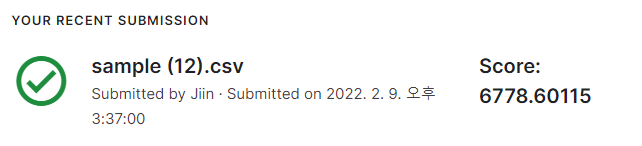

50에서 60등 사이인데 1등 도대체 어케 한겨 진짜 대단.

스케일링하면 개망하는 문제
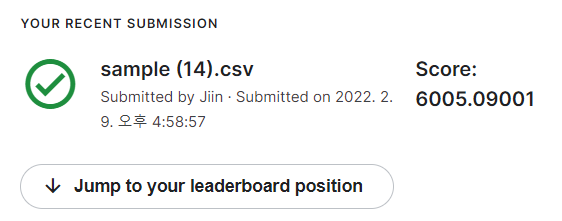